# Theory

The wave equation in one-dimensional form is written as

\begin{equation}
\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0,
\end{equation}

where $u$ is the wave distribution in space $x$ and time $t$, and $c$ is wave velocity.

# Methods

## Forward Euler

## Euler Backward

## Forward Time Central Space (FTCS)

## Hybrid Method

## Lax

## Lax-Wendroff

## Leapfrog

## 2nd order in time, 4th order in space (F2S4)

# Wave shape

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('testCase/result.csv')

<AxesSubplot:>

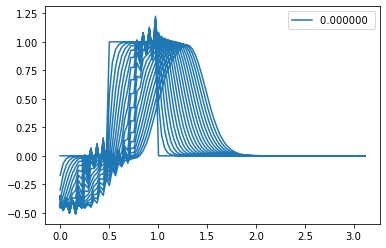

In [3]:
df.plot()